In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [81]:
def leaky_relu(z):
  return np.maximum(0.01*z, z)

In [82]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [83]:
def leaky_relu_derivative(z):
  return np.array(z > 0)

In [84]:
def sigmoid_derivative(z):
  a = sigmoid(z)
  return a * (1 - a)

In [85]:
def tanh(z):
  return np.tanh(z)

In [86]:
def tanh_derivative(z):
  return (1 - np.power(z,2))

In [87]:
def relu(z):
  return (np.maximum(0, z))

In [88]:
def relu_derivative(z):
  return z > 0

In [89]:
def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
  return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [90]:
def softmax_derivative(z):
  a = softmax(z)
  return a * (1 - a)

In [91]:
def initial_parameters(layers):
  parameters = {}

  for i in range(1, len(layers)):
    parameters[f"w{i}"] = np.random.randn(layers[i], layers[i - 1]) / np.sqrt(layers[i - 1])
    parameters[f"b{i}"] = np.zeros((layers[i], 1))

  return parameters

In [92]:
def forward_propagation(x, parameters, activation):
  L = len(parameters) // 2
  forward_cache = {}
  forward_cache = {"a0": x}

  for i in range(1, L):
    forward_cache[f"z{i}"] = np.dot(parameters[f"w{i}"], forward_cache[f"a{i-1}"]) + parameters[f"b{i}"]
    a = activation[i - 1](forward_cache[f"z{i}"])
    forward_cache[f"a{i}"] = a

  forward_cache[f"z{L}"] = np.dot(parameters[f"w{L}"] ,forward_cache[f"a{L - 1}"]) + parameters[f"b{L}"]
  forward_cache[f"a{L}"] = softmax(forward_cache[f"z{L}"])

  return forward_cache[f"a{L}"], forward_cache

In [93]:
def nn_cost(a,y):
  m = y.shape[1]
  cost = -(1 / m) * np.sum(y * np.log(a))
  cost = np.squeeze(cost)
  return cost

In [94]:
def backward_propagation(a,y, parameters, forward_cache, activation_derivative):
  gradient = {}
  m = y.shape[1]
  L = len(parameters) // 2

  gradient[f"dz{L}"] = a - y
  gradient[f"dw{L}"] = (1 / m) * np.dot(gradient[f"dz{L}"], forward_cache[f"a{L - 1}"].T)
  gradient[f"db{L}"] = (1 / m) * np.sum(gradient[f"dz{L}"], axis=1, keepdims=True)

  for i in reversed(range(1, L)):
    gradient[f"dz{i}"] = np.dot(parameters[f"w{i + 1}"].T, gradient[f"dz{i + 1}"]) * activation_derivative[i - 1](forward_cache[f"a{i}"])
    gradient[f"dw{i}"] = (1 / m) * np.dot(gradient[f"dz{i}"], forward_cache[f"a{i - 1}"].T)
    gradient[f"db{i}"] = (1 / m) * np.sum(gradient[f"dz{i}"], axis=1, keepdims=True)

  return gradient

In [95]:
def update_parameter(parameters, gradient, alpha):
  L = len(parameters) // 2

  for i in range(1, L + 1):
    parameters[f"w{i}"] -= alpha * gradient[f"dw{i}"]
    parameters[f"b{i}"] -= alpha * gradient[f"db{i}"]

  return parameters

In [96]:
def nn(x, y, layers, activation, activation_derivative, alpha, num_itr):
  parameters = initial_parameters(layers)
  cost_ = []
  for i in range(num_itr):
    a , forward_cache = forward_propagation(x, parameters, activation)
    cost = nn_cost(a, y)
    gradient = backward_propagation(a, y, parameters, forward_cache, activation_derivative)
    parameters = update_parameter(parameters, gradient, alpha)

    if i % 100 == 0:
      print(f"Iteration {i} \t Cost: {cost}")
      cost_.append(cost)

  fig, ax = plt.subplots()
  ax.plot(cost_)
  ax.set_xlabel('Iterations')
  ax.set_ylabel('Cost')
  ax.set_title('Cost vs Iterations')
  plt.show()

  return parameters

In [97]:
def nn_train_data(path):
  path = path.strip("'")
  df = pd.read_csv(path)

  u,v = df.shape
  v -= 2
  a_start = int(input("give the starting index of training data:"))
  a_end = int(input("give the ending index of training data:"))
  a = a_end - a_start
  x = np.zeros((v,a))
  y= np.zeros((1,a))

  df = df.iloc[a_start:a_end,1:]
  y[0] = df[df.columns[-1]].to_numpy()
  for i in range(v):
    x[i] = df[df.columns[i]].to_numpy()

  return (x,y)

In [98]:
def nn_test_data(path):
  path = path.strip("'")
  df = pd.read_csv(path)

  u,v = df.shape
  v -= 1
  x = np.zeros((v,u))
  y= np.zeros((1,u))

  df = df.iloc[:,1:]
  for i in range(v):
    x[i] = df[df.columns[i]].to_numpy()

  return (x,y)

In [99]:
x,y = nn_train_data('/content/multi_classification_train.csv')
print(y)

give the starting index of training data:0
give the ending index of training data:1000
[[1. 2. 4. 2. 2. 1. 2. 3. 1. 4. 2. 2. 2. 3. 4. 1. 1. 3. 3. 0. 2. 0. 4. 2.
  4. 1. 2. 2. 2. 3. 0. 2. 3. 1. 1. 3. 4. 2. 0. 1. 2. 2. 3. 2. 0. 2. 0. 2.
  1. 2. 2. 1. 1. 1. 2. 1. 4. 2. 1. 2. 2. 3. 2. 2. 4. 3. 2. 0. 4. 2. 2. 2.
  1. 3. 2. 4. 1. 1. 4. 1. 1. 3. 1. 2. 4. 2. 3. 2. 1. 2. 3. 2. 1. 1. 4. 2.
  3. 3. 1. 2. 2. 0. 3. 2. 1. 1. 3. 2. 0. 3. 2. 2. 4. 3. 2. 2. 2. 1. 2. 2.
  2. 3. 0. 0. 0. 1. 0. 2. 2. 3. 0. 4. 1. 2. 3. 3. 2. 2. 2. 0. 2. 2. 1. 2.
  3. 1. 3. 2. 1. 3. 1. 0. 1. 3. 2. 2. 1. 1. 4. 0. 4. 0. 1. 3. 0. 4. 3. 0.
  2. 1. 4. 1. 2. 2. 3. 0. 2. 3. 1. 2. 1. 1. 1. 0. 4. 4. 2. 3. 2. 0. 2. 1.
  4. 3. 0. 4. 2. 2. 2. 2. 2. 1. 0. 3. 1. 0. 1. 3. 2. 1. 2. 1. 2. 2. 3. 2.
  2. 2. 1. 0. 3. 3. 1. 1. 0. 3. 2. 2. 3. 4. 3. 3. 3. 1. 3. 2. 1. 1. 1. 2.
  1. 4. 3. 4. 1. 0. 2. 1. 2. 2. 4. 4. 1. 3. 1. 2. 3. 2. 4. 4. 1. 2. 1. 2.
  2. 1. 4. 1. 1. 3. 2. 2. 2. 3. 1. 3. 0. 2. 0. 2. 1. 2. 2. 1. 3. 2. 1. 2.
  2. 4. 0. 0. 4. 2. 3. 2.

In [100]:
x_test,y_test = nn_test_data('/content/multi_classification_test.csv')

In [101]:
def multi_to_binary(y):
  m = y.shape[1]
  a = int(y.max() + 1)
  y_new = np.zeros((a,m))
  for i in range(m):
    y_new[int(y[0,i]),i] = 1
  return y_new

In [102]:
y = multi_to_binary(y)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 1.]]


In [103]:
def layer_data(layers):
  n = int(input("Enter the number of hidden layers: "))
  for i in range(n):
    layers.insert(-1,int(input(f"Enter the number of neurons in hidden layer {i+1}: ")))
  return layers

In [104]:
def activation_data(n):
  activation = []
  activation_derivatives = []
  print("1. Relu")
  print("2. Leaky Relu")
  print("3. Tanh")
  for i in range(n):
    a = int(input(f"Enter the activation function for hidden layer {i+1}: "))
    if a == 1:
      activation.append(relu)
      activation_derivatives.append(relu_derivative)
    elif a == 2:
      activation.append(leaky_relu)
      activation_derivatives.append(leaky_relu_derivative)
    elif a == 3:
      activation.append(tanh)
      activation_derivatives.append(tanh_derivative)

  return activation,activation_derivatives

Enter the number of hidden layers: 2
Enter the number of neurons in hidden layer 1: 10
Enter the number of neurons in hidden layer 2: 15
5
1. Relu
2. Leaky Relu
3. Tanh
Enter the activation function for hidden layer 1: 2
Enter the activation function for hidden layer 2: 2
Enter the activation function for hidden layer 3: 2
Enter the value of alpha: 0.01
Enter the number of iteration: 1000
Iteration 0 	 Cost: 29.767614079103915
Iteration 100 	 Cost: 1.107132516237702
Iteration 200 	 Cost: 0.9042322144042204
Iteration 300 	 Cost: 0.7896132092502753
Iteration 400 	 Cost: 0.7336865995914565
Iteration 500 	 Cost: 0.6924632692553505
Iteration 600 	 Cost: 0.6555979203467399
Iteration 700 	 Cost: 0.6058732317665259
Iteration 800 	 Cost: 0.5609962032696486
Iteration 900 	 Cost: 0.5327014210811147


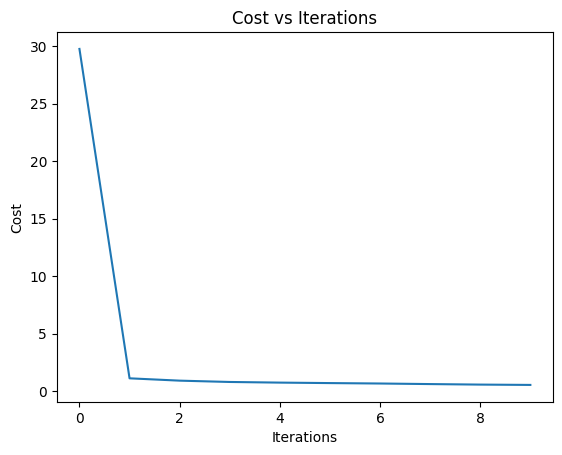

In [105]:
layers = [x.shape[0],y.shape[0]]
layers = layer_data(layers)
print(y.shape[0])

activation,activation_derivatives = activation_data(len(layers)-1)

alpha = float(input("Enter the value of alpha: "))
num_itr = int(input("Enter the number of iteration: "))
parameters = nn(x,y, layers, activation, activation_derivatives,alpha,num_itr)

In [106]:
print(parameters)

{'w1': array([[-2.50823228e-02, -3.59496289e-02, -4.14974800e-01,
        -2.16933767e-01,  2.69836820e-01, -1.94878456e-01,
        -4.76901241e-04,  2.43774198e-01,  3.68772337e-01,
         7.35701509e-02, -5.18743643e-02, -3.06292314e-01,
         4.86285206e-02,  2.81367869e-02,  2.69794556e-01,
        -4.54093044e-01, -1.01411339e-01,  4.12121118e-02,
        -6.93681723e-02, -1.24387097e-01],
       [ 1.88573669e-02,  5.70427746e-01, -3.21197808e-01,
        -4.20248338e-01, -7.51586973e-02,  8.61437799e-02,
        -1.55305421e-01, -2.58054730e-01,  7.77333944e-02,
        -2.72916590e-01, -1.14589490e-01,  1.63219596e-01,
        -5.83067446e-01,  2.69263527e-01, -4.38800444e-02,
        -1.98405294e-01, -2.16557955e-01,  3.53248644e-01,
         1.49006855e-02, -1.09734711e-01],
       [-8.11270698e-02,  8.72236140e-04, -3.45024125e-02,
         8.12384502e-02,  2.09440392e-01, -6.63713773e-03,
         3.34874677e-01,  9.75382980e-02,  2.24719888e-01,
         1.25852019e-0

In [107]:
def test(x):
  a,_ =  forward_propagation(x, parameters, activation)
  return a

In [108]:
x_cv,y_cv = nn_train_data('/content/multi_classification_train.csv')

give the starting index of training data:1500
give the ending index of training data:1700


In [109]:
y_cv = multi_to_binary(y_cv)
y_hat = test(x_cv)
print(y_hat)

[[2.02225970e-01 1.52422882e-04 3.60371658e-09 1.77429220e-01
  1.13177290e-07 7.04820263e-03 9.65680808e-02 1.87957986e-08
  8.60994889e-06 1.13039991e-12 8.35709473e-02 2.76270805e-01
  4.37346095e-03 5.38100485e-03 1.58978648e-01 1.13949302e-02
  1.51768766e-01 3.52952401e-01 2.42441723e-14 2.52045869e-22
  5.80654053e-24 5.41611005e-03 6.96994509e-03 3.36177843e-03
  2.34235219e-06 2.97928753e-03 9.73630334e-06 9.91887143e-11
  5.33618715e-10 4.42654700e-05 3.16829667e-02 4.48238639e-01
  6.72795687e-02 3.15250761e-07 1.75700790e-19 2.20174104e-07
  2.85883340e-02 2.23111932e-12 2.72490566e-01 5.08886113e-04
  1.06616075e-28 7.53791057e-17 1.21100786e-02 5.90162119e-34
  7.37580557e-03 2.93574042e-02 1.16663046e-01 2.32184526e-07
  2.96764735e-12 1.50584671e-04 8.21628589e-11 4.41607808e-03
  1.73489697e-12 3.84992315e-04 4.42912531e-12 1.41850559e-22
  9.18366679e-03 1.12090081e-08 7.93238649e-17 3.58758520e-02
  2.18285988e-01 4.63222513e-08 4.14976531e-09 2.99635254e-01
  3.2345

In [110]:
y_hat = np.squeeze(y_hat)
for i in range(y_hat.shape[1]):
  a = max(y_hat[:,i])
  for j in range(y_hat.shape[0]):
    if y_hat[j,i] == a:
      y_hat[j,i] = 1
    else:
      y_hat[j,i] = 0
print(y_hat)
print("   ")
print(y_cv)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 

In [111]:
def F1_score(y_hat,y):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  y = np.squeeze(y)
  y_hat = np.squeeze(y_hat)
  for i in range(len(y)):
    if y_hat[i] ==1 and y[i] == 1:
      tp += 1
    elif y_hat[i] ==0 and y[i] == 0:
      tn += 1
    elif y_hat[i] == 0 and y[i] == 1:
      fn += 1
    else:
      fp += 1

  precision = tp / (tp + fp + 1e-10)
  recall = tp / (tp + fn + 1e-10)
  F1 = 2 * precision * recall / (precision + recall + 1e-10)
  return F1,tp,fp,fn

In [112]:
f1 = np.zeros(y_cv.shape[0])
tn = 0
fp = 0
fn = 0
for i in range(y_cv.shape[0]):
  f1[i],a,b,c = F1_score(y_hat[i],y_cv[i])
  tn += a
  fp += b
  fn += c

precision = tn / (tn + fp + 1e-10)
recall = tn / (tn + fn + 1e-10)
f1_micro = 2 * precision * recall / (precision + recall + 1e-10)
print(f"f1 :{f1}")
print(f"macro_f1 : {np.mean(f1)}")
print(f"micro_f1 : {f1_micro}")

f1 :[0.46666667 0.61538462 0.7260274  0.7        0.60869565]
macro_f1 : 0.623354866246134
micro_f1 : 0.6649999999496675


In [113]:
pred,_ = forward_propagation(x_test, parameters, activation)
print(pred)

[[3.87006704e-05 3.39740234e-11 7.83235537e-13 ... 1.71676594e-01
  6.26128025e-01 2.77753353e-07]
 [2.07695413e-02 9.91943064e-01 9.83628151e-01 ... 2.13142458e-01
  4.13251532e-03 8.81422817e-01]
 [1.07092227e-07 5.15180383e-04 5.40039010e-05 ... 4.06323823e-02
  2.88602721e-03 1.92816719e-06]
 [6.66142167e-01 9.37177082e-05 1.60859491e-02 ... 4.69267071e-01
  3.66807229e-01 1.18011236e-01]
 [3.13049484e-01 7.44803837e-03 2.31895649e-04 ... 1.05281494e-01
  4.62026826e-05 5.63740885e-04]]


In [114]:
pred = np.squeeze(pred)
for i in range(pred.shape[1]):
  a = max(pred[:,i])
  for j in range(pred.shape[0]):
    if pred[j,i] == a:
      pred[j,i] = 1
    else:
      pred[j,i] = 0
print(pred)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [115]:
m,n = pred.shape
y_pred = np.zeros(n)
for i in range(n):
  for j in range(m):
    if pred[j,i] == 1:
      y_pred[i] = j
print(y_pred)

[3. 1. 1. ... 3. 0. 1.]


In [116]:
np.savetxt('multi-Classification test Result.csv', y_pred, delimiter=',')